<h1>Kapitel 12 Introduktion till Regression och korrelation</h1>

In [1]:
#importera paket och exempeldata 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs 
from scipy.stats import t
from scipy.stats import norm
from statsmodels.stats import proportion
import statsmodels.api as sm
from statsmodels.formula.api import ols

Debt_Payments = None
with pd.ExcelFile(r"\\home.gu.gu.se\home-XS$\xsumat\Documents\ITHS\Data\Kap12.xlsx") as reader:
        Debt_Payments=pd.read_excel(reader, sheet_name='Debt_Payments')

In [2]:
Debt_Payments.head()

,Metropolitan area,Debt,Income,Unemployment
0,"Washington, D.C.",1285,103.5,6.3
1,Seattle,1135,81.7,8.5
2,Baltimore,1133,82.2,8.1
3,Boston,1133,89.5,7.6
4,Denver,1104,75.9,8.1


<h3>Scatter plot av Debt vs. Income</h3>

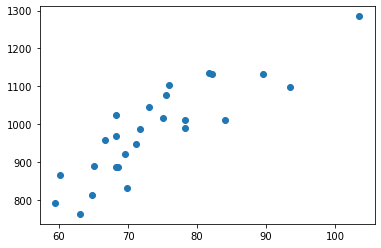

In [3]:
plt.scatter(Debt_Payments['Income'],Debt_Payments['Debt'])
plt.show()

<h3>Gör regression med statsmodels</h3>

In [2]:

model = ols('Debt ~ Income', data=Debt_Payments).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Debt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     73.00
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           9.66e-09
Time:                        15:29:37   Log-Likelihood:                -143.68
No. Observations:                  26   AIC:                             291.4
Df Residuals:                      24   BIC:                             293.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.2977     91.339      2.302      0.0

<h3>Korrelation med Pandas</h3>

In [5]:
Debt_Payments[['Income','Debt']].corr()

,Income,Debt
Income,1.000000,0.867512
Debt,0.867512,1.000000


<h3>Korrelation med scipy.stats</h3>

In [6]:
r,p=scs.pearsonr(Debt_Payments['Income'],Debt_Payments['Debt'])
r

0.8675115383209512

<h3>In sample-prediktion</h3>

In [3]:
ypred = model.predict(Debt_Payments['Income'])
print(ypred)

0     1290.952093
1     1063.335995
2     1068.556548
3     1144.776617
4     1002.777583
5     1185.496928
6      998.601141
7      973.542488
8      922.381072
9      994.424699
10    1027.836236
11    1087.350537
12    1027.836236
13     959.969051
14     923.425182
15     905.675303
16     953.704388
17     935.954509
18     890.013645
19     926.557514
20     923.425182
21     838.852229
22     939.086840
23     886.881313
24     830.499344
25     868.087324
dtype: float64


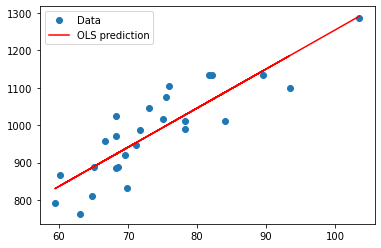

In [4]:
fig, ax = plt.subplots()
ax.plot(Debt_Payments['Income'],Debt_Payments['Debt'], "o", label="Data")
ax.plot(Debt_Payments['Income'], ypred, "r", label="OLS prediction")
ax.legend(loc="best")
plt.show()

<h3>Out of sample-prediktion</h3>

In [6]:

Income_new=pd.DataFrame([92,103,202], columns=['Income'])
ypred = model.predict(Income_new)
print(ypred)
#Income_new

0    1170.879380
1    1285.731540
2    2319.400975
dtype: float64
